<a href="https://colab.research.google.com/github/gracesjy/mldl_study/blob/main/04_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **인피니티북스 "누구나 쉽게 배우는 딥러닝 스타트"(1판) 교재 소스 코드**

## **4장 선형회귀와 경사하강법**
---
* 출판사 : 인피니티북스( https://www.infinitybooks.co.kr )
* 저자 : 박동규
* 소스코드 저장소 : https://github.com/dongupak/DLstart
* 저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저자 표기와 함께 배포해 주십시오.
 * https://www.yes24.com/Product/Goods/124152667
 * 책의 오류는 dongupak@gmail.com 으로 알려주십시오.
---

### 02 오차와 오차의 측정
#### 평균 절대값 오차와 평균 제곱 오차

In [ ]:
import numpy as np

# 넘파이를 이용하여 구현한 평균 절대 오차
y = np.array([1, 2, 3, 4, 5])                  # 실제 y값
y_hat = np.array([1.2, 2.4, 2.5, 4.6, 5.4])    # 추정한 y값
diff = np.abs(y - y_hat)                       # y_hat과 y 차이의 절대값
e_mae = diff.sum() / len(diff)                 # 오차의 합/데이터의 수
print('평균 절대 오차 =', e_mae)

평균 절대 오차 = 0.41999999999999993


In [ ]:
print('평균 절대 오차 =', np.average(diff))

평균 절대 오차 = 0.41999999999999993


In [ ]:
from sklearn.metrics import mean_absolute_error

# sklearn에서 제공하는 함수를 사용해보자. 위의 결과와 동일하다.
print('평균 절대 오차 =', mean_absolute_error(y, y_hat))

평균 절대 오차 = 0.41999999999999993


#### 평균 제곱 오차

In [ ]:
import numpy as np

# 넘파이를 이용하여 구현한 평균 제곱 오차
y = np.array([1, 2, 3, 4, 5])                 # 실제 y값
y_hat = np.array([1.2, 2.4, 2.5, 4.6, 5.4])   # 추정한 y값
diff = (y - y_hat) ** 2     # y_hat과 y의 차이값의 제곱
e_mse = np.average(diff)
print('평균 제곱 오차 =', e_mse)

평균 제곱 오차 = 0.19399999999999995


In [ ]:
from sklearn.metrics import mean_squared_error

# sklearn에서 제공하는 함수를 사용해보자. 위의 결과와 동일하다.
print('평균 제곱 오차 =', mean_squared_error(y, y_hat))

평균 제곱 오차 = 0.19399999999999995


In [ ]:
import numpy as np

# 넘파이를 이용하여 구현한 평균 절대 오차
y = np.array([2, 4, 6, 8, 10])  # 실제 y값
y_hat = np.array([2.1, 4.3, 5.5, 7.9, 10.1])  # 추정한 y값
diff = np.abs(y_hat - y)     # y_hat과 y 차이의 절대값
e_mae = np.average(diff)
print('모델 A의 평균 절대 오차 =', e_mae)

diff = (y - y_hat) ** 2     # y_hat과 y의 차이값의 제곱
e_mse = np.average(diff)
print('모델 A의 평균 제곱 오차 =', e_mse)

모델 A의 평균 절대 오차 = 0.21999999999999983
모델 A의 평균 제곱 오차 = 0.07399999999999997


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('모델 A의 평균 제곱 오차 =', mean_absolute_error(y, y_hat))
print('모델 A의 평균 절대 오차 =', mean_squared_error(y, y_hat))

모델 A의 평균 제곱 오차 = 0.21999999999999983
모델 A의 평균 절대 오차 = 0.07399999999999997


---
### 04 사이킷런을 이용한 선형 회귀
#### 간단한 데이터로 선형 회귀를 수행해 보자

In [ ]:
import numpy as np
from sklearn import linear_model  # scikit-learn 모듈을 가져온다

# 선형회귀 모델을 생성한다
regr = linear_model.LinearRegression()

In [ ]:
X = [[163], [179], [166], [169], [171]]
y = [54, 63, 57, 56, 58]
regr.fit(X, y)

LinearRegression()

In [ ]:
coef = regr.coef_            # 직선의 기울기
intercept = regr.intercept_  # 직선의 절편
score = regr.score(X, y)     # 학습된 직선이 데이터를 얼마나 잘 따르나

print("y = {}* X + {:.2f}".format(coef.round(2), intercept))
print("데이터와 선형 회귀 직선의 관계점수: {:.1%}".format(score))

y = [0.53]* X + -32.50
데이터와 선형 회귀 직선의 관계점수: 91.9%


#### 데이터를 시각화하고 차원을 증가시키자





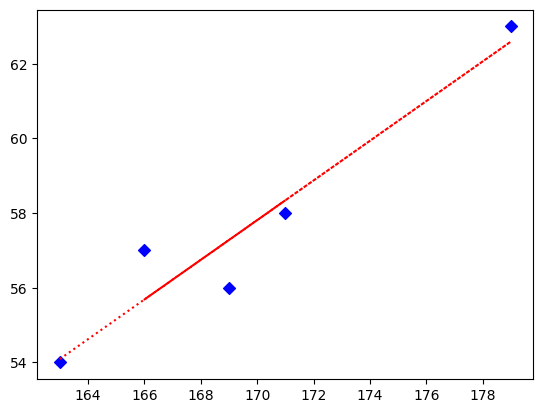

In [ ]:
import matplotlib.pyplot as plt

# 학습 데이터와 y값을 산포도로 그린다.
plt.scatter(X, y, color='blue', marker='D')
# 학습 데이터를 입력으로 하여 예측값을 계산한다.
y_pred = regr.predict(X)
# 계산된 기울기와 y 절편을 가지는 점선을 그려보자
plt.plot(X, y_pred, 'r:')

In [ ]:
unseen = [[167]]
result = regr.predict(unseen)
print('동민이의 키가 {}cm 이므로 몸무게는 {}kg으로 추정됨'.format(\
                      unseen, result.round(1)))

동민이의 키가 [[167]]cm 이므로 몸무게는 [56.2]kg으로 추정됨


In [ ]:
regr = linear_model.LinearRegression()

X = [[168, 0], [166, 0], [173, 0], [165, 0], [177, 0], [163, 0], \
     [178, 0], [172, 0], [163, 1], [162, 1], [171, 1], [162, 1], \
     [164, 1], [162, 1], [158, 1], [173, 1], ]    # 2차원 입력 데이터
y = [65, 61, 68, 63, 68, 61, 76, 67, 55, 51, 59, 53, 61, 56, 44, 57]
regr.fit(X, y)         # 학습시키기

print('계수 :', regr.coef_ )
print('절편 :', regr.intercept_)
print('점수 :', regr.score(X, y))
print('키 167cm 남학생인 동민이의 추정 몸무게 :', regr.predict([[167, 0]]))
print('키 167cm 여학생인 은지의 추정 몸무게 :', regr.predict([[167, 1]]))

계수 : [ 0.75 -7.23]
절편 : -61.22778389430634
점수 : 0.8425933302504423
키 167cm 남학생인 동민이의 추정 몸무게 : [63.69]
키 167cm 여학생인 은지의 추정 몸무게 : [56.46]


#### 오차 곡면을 알아보자

In [ ]:
X = np.array([1, 4.5, 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])

w, b = 0, 0   # w, b의 초기값을 0으로 두자
learning_rate, epoch = 0.005, 1000 # 학습률과 학습 횟수(에폭)
n = len(X)    # 입력 데이터 수

for i in range(epoch):    # 학습 루프
    y_pred = w*X + b      # 현재 w, b를 이용한 작업 T
    error = y_pred - y    # 성능척도 P
    w = w - learning_rate * (error * X).sum() # 경험 E로 개선
    b = b - learning_rate * error.sum()

print('w =', w.round(2), ', b =', b.round(2))

w = 0.63 , b = -1.65


#### 경사 하강법과 학습률

In [ ]:
from sklearn import linear_model
import numpy as np

X = np.array([1, 4.5, 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])
regr = linear_model.LinearRegression() # 절편값 b는 0으로 둔다
X = X[:, np.newaxis]
regr.fit(X, y)         # 학습

print('w =', regr.coef_.round(2), \
     ', b =', regr.intercept_.round(2))

w = [0.63] , b = -1.65


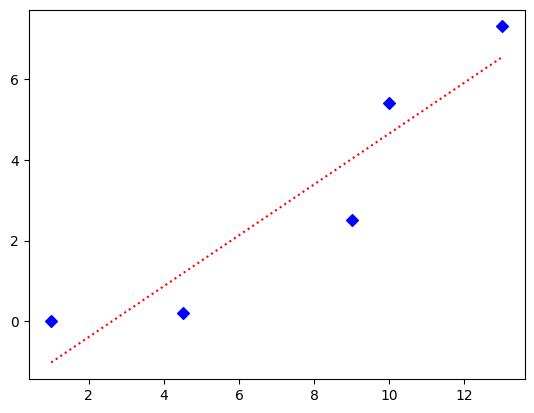

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X = np.array([1, 4.5, 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])
plt.scatter(X, y, color='blue', marker='D')

# 계산으로 구한 w, b를 이용하여 선형 회귀 직선을 그리자
y_pred = 0.63 * X - 1.65
plt.plot(X, y_pred, 'r:')

In [ ]:
# 학습률이 너무 작은 경우
X = np.array([1, 4.5, 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])

w, b = 0, 0   # w, b의 초기값을 0으로 두자
learning_rate, epoch = 0.00001, 1000 # 학습률과 학습횟수(에폭)
n = len(X)    # 입력 데이터 수

for i in range(epoch):    # 학습 루프
    y_pred = w*X + b      # 현재 w, b를 이용한 작업 T
    error = y_pred - y    # 성능척도 P
    w = w - learning_rate * (error * X).sum() # 경험 E로 개선
    b = b - learning_rate * error.sum()

print('w =', w.round(2), ', b =', b.round(2))

w = 0.45 , b = 0.03


In [ ]:
# 학습률이 너무 큰 경우
X = np.array([1, 4.5, 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])

w, b = 0, 0   # w, b의 초기값을 0으로 두자
learning_rate, epoch = 1.0, 1000 # 학습률과 학습횟수(에폭)
n = len(X)    # 입력 데이터 수

for i in range(epoch):    # 학습 루프
    y_pred = w*X + b      # 현재 w, b를 이용한 작업 T
    error = y_pred - y    # 성능척도 P
    w = w - learning_rate * (error * X).sum() # 경험 E로 개선
    b = b - learning_rate * error.sum()

print('w =', w.round(2), ', b =', b.round(2))

w = nan , b = nan


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
<ipython-input-59-314e307df5c3>:12: RuntimeWarning: invalid value encountered in scalar subtract
  w = w - learning_rate * (error * X).sum() # 경험 E로 개선


#### 정규화와 표준화

Text(0, 0.5, 'num of rooms')

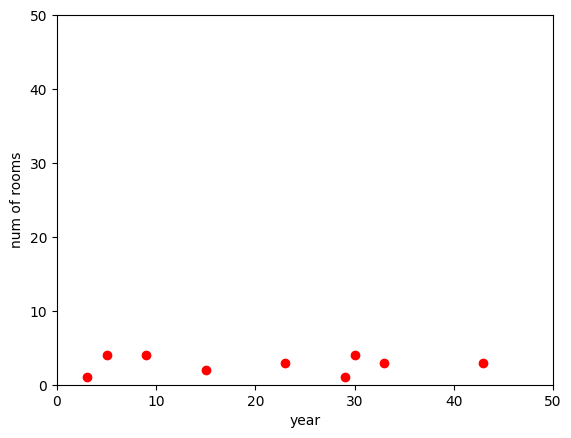

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

yr = [15, 30, 23, 5, 9, 43, 33, 29, 3, 56]
n_rooms = [2, 4, 3, 4, 4, 3, 3, 1, 1, 2]

plt.scatter(yr, n_rooms, c='red')
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.xlabel('year')
plt.ylabel('num of rooms')

In [ ]:
import numpy as np

yr = np.array([15, 30, 23, 5, 9, 43, 33, 29, 3, 56])
n_rooms = np.array([2, 4, 3, 4, 4, 3, 3, 1, 1, 2])

print(f'정규화 이전의 yr: {yr}')
sz = np.max(yr) - np.min(yr)
np.set_printoptions(precision=2)
print(f'정규화 이후의 yr: {((yr - np.min(yr))/sz)}')

print(f'정규화 이전의 n_rooms: {n_rooms}')
sz = np.max(n_rooms) - np.min(n_rooms)
print(f'정규화 이후의 n_rooms: {((n_rooms - np.min(n_rooms))/sz)}')

정규화 이전의 yr: [15 30 23  5  9 43 33 29  3 56]
정규화 이후의 yr: [0.23 0.51 0.38 0.04 0.11 0.75 0.57 0.49 0.   1.  ]
정규화 이전의 n_rooms: [2 4 3 4 4 3 3 1 1 2]
정규화 이후의 n_rooms: [0.33 1.   0.67 1.   1.   0.67 0.67 0.   0.   0.33]


Text(0, 0.5, 'num of rooms')

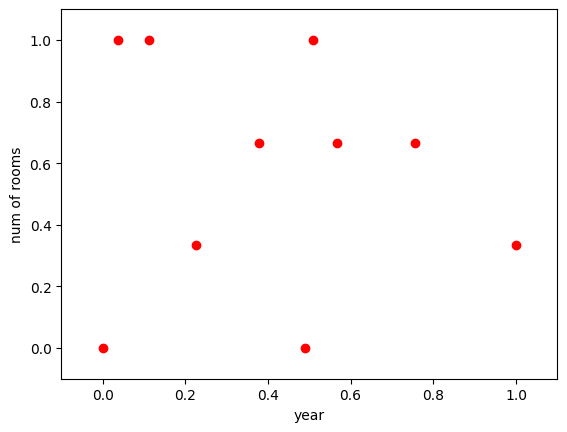

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

yr = np.array([15, 30, 23, 5, 9, 43, 33, 29, 3, 56])
n_rooms = np.array([2, 4, 3, 4, 4, 3, 3, 1, 1, 2])

min_max_scaler = MinMaxScaler()
yr_norm = min_max_scaler.fit_transform(yr[:, np.newaxis])
n_rooms_norm = min_max_scaler.fit_transform(n_rooms[:, np.newaxis])

plt.scatter(yr_norm, n_rooms_norm, c='red')
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.xlabel('year')
plt.ylabel('num of rooms')

In [ ]:
import numpy as np

yr = np.array([15, 30, 23, 5, 9, 43, 33, 29, 3, 56])
n_rooms = np.array([2, 4, 3, 4, 4, 3, 3, 1, 1, 2])

print(f'정규화 이전의 yr: {yr}')
sz = np.max(yr) - np.min(yr)
np.set_printoptions(precision=2) # 출력의 정밀도 설정
print(f'정규화 이후의 yr: {((yr - np.min(yr))/sz)}')

print(f'정규화 이전의 n_rooms: {n_rooms}')
sz = np.max(n_rooms) - np.min(n_rooms)
print(f'정규화 이후의 n_rooms: {((n_rooms - np.min(n_rooms))/sz)}')

정규화 이전의 yr: [15 30 23  5  9 43 33 29  3 56]
정규화 이후의 yr: [0.23 0.51 0.38 0.04 0.11 0.75 0.57 0.49 0.   1.  ]
정규화 이전의 n_rooms: [2 4 3 4 4 3 3 1 1 2]
정규화 이후의 n_rooms: [0.33 1.   0.67 1.   1.   0.67 0.67 0.   0.   0.33]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# 표준화 데이터를 생성함
yr_scaled_d = scaler.fit_transform(yr[:, np.newaxis])
print(f'표준화 이전의 yr: {yr}')
np.set_printoptions(precision=2)
print(f'표준화 이후의 yr: {yr_scaled_d}')

표준화 이전의 yr: [15 30 23  5  9 43 33 29  3 56]
표준화 이후의 yr: [[-0.59]
 [ 0.33]
 [-0.1 ]
 [-1.21]
 [-0.96]
 [ 1.13]
 [ 0.52]
 [ 0.27]
 [-1.33]
 [ 1.94]]


In [ ]:
print(f'표준화 이후의 yr: {yr_scaled_d.flatten()}')

표준화 이후의 yr: [-0.59  0.33 -0.1  -1.21 -0.96  1.13  0.52  0.27 -1.33  1.94]
